<a href="https://colab.research.google.com/github/HuseyinAts/TrendMiner-Acikhack2023/blob/main/teknofest_soft_assigment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 56.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 85.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 200.1/200.1 KB 23.3 MB/s eta 0:00:00


In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
import torch
import transformers as ppb
import warnings
warnings.filterwarnings('ignore')


import tensorflow as tf
import torch
import time
import datetime
import random
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from google.colab import drive

import transformers
from transformers import BertTokenizer
from torch.utils.data import TensorDataset, random_split
from torch.utils.data import DataLoader, RandomSampler, SequentialSampler
from transformers import BertForSequenceClassification, AdamW, BertConfig
from transformers import get_linear_schedule_with_warmup

from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder

In [3]:
import torch
from torch.utils.data import TensorDataset, DataLoader, RandomSampler, SequentialSampler
from transformers import BertTokenizer, BertForSequenceClassification
from sklearn.model_selection import train_test_split

import pandas as pd
import numpy as np

from tabulate import tabulate
from tqdm import trange
import random

import json
import re
import numpy as np
import torch as th


In [4]:
# check GPU
device_name = tf.test.gpu_device_name()
if device_name == '/device:GPU:0':
    device = torch.device("cuda")
    print('GPU:', torch.cuda.get_device_name(0))
else:
    raise SystemError('GPU device not found')

GPU: NVIDIA A100-SXM4-40GB


In [5]:
### Install Hugging Face Hub
!python -m pip install huggingface_hub
!python -m pip install evaluate

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.4/81.4 KB 4.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.5/110.5 KB 7.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 132.9/132.9 KB 16.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.2/212.2 KB 26.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 468.7/468.7 KB 45.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 52.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.2/114.2 KB 14.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.8/158.8 KB 20.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 264.6/264.6 KB 28.0 MB/s eta 0:00:00


In [6]:
from huggingface_hub import notebook_login

notebook_login()

Token is valid.
Your token has been saved in your configured git credential helpers (store).
Your token has been saved to /root/.cache/huggingface/token
Login successful


In [7]:
# set environment as googledrive to folder "teknofest"
data_path =  "/teknofest/"

try:
    drive.mount('/content/teknofest')
    data_path = "/content/drive/My Drive/teknofest/"

except:
    print("You are not working in Colab at the moment :(")

Mounted at /content/teknofest


In [8]:
df=pd.read_excel('/content/final.xlsx')
df.loc[df['target']=='SEXIST','encoded_categories'] = '1'
df.loc[df['target']=='RACIST','encoded_categories'] = '2'
df.loc[df['target']=='PROFANITY','encoded_categories'] ='3'
df.loc[df['target']=='INSULT','encoded_categories'] = '4'
df.loc[df['target']=='OTHER','encoded_categories'] = '0'
#df.loc[df['target']==1,'encoded_categories'] = 'A/I AK Native'
#df.loc[(df['eri_afr_amer'] + df['eri_asian'] + df['eri_hawaiian'] + df['eri_nat_amer'] + df['eri_white']) > 1,'race_label'] = 'Two Or More'
#df.loc[df['eri_hispanic']==1,'race_label'] = 'Hispanic'
df['encoded_categories'].fillna('Other', inplace=True)

In [9]:
df['encoded_categories'] = LabelEncoder().fit_transform(df['encoded_categories'])

print(df.sample(10))
print(df.groupby('target').size())

                                                    text  is_offensive  \
8046                            yuvayı kuran dişi kuştur           1.0   
2524                       senin kokundan miden kalkiyor           1.0   
1185       Benim aklıma gelip başkasına gidişini sikeyim           1.0   
1889   ticari analizde dolaylı ve dışsal etkiler dikk...           0.0   
4963              senin beynin bu konuyu anlamaya yetmez           1.0   
9224   İlk o yazsın diye diye hepsini evlendirdik amı...           1.0   
9266           alman ananın amına koyayım orospu yavrusu           1.0   
325                                damızlık boğa gibisin           1.0   
6679                          Kusmuğum bile senden temiz           1.0   
11865                                   amelemisin oğlum           1.0   

          target  encoded_categories  
8046      SEXIST                   1  
2524      INSULT                   4  
1185   PROFANITY                   3  
1889       OTHER             

In [ ]:
##############################df = pd.read_excel('/content/final.xlsx')
df['encoded_categories'] = LabelEncoder().fit_transform(df['target'])

print(df.sample(10))
print(df.groupby('target').size())

                                                    text  is_offensive  \
4745          Anan baban akrabamı da böyle bi tipsin sen           1.0   
312                      nicin sinirleniyorsun turk gibi           1.0   
6745                        ben partiden hic hoslanmadim           0.0   
7991                                 tahta gibi göğüsler           1.0   
2643   ne yani terbiyesizlik ettiğimi mi ima ediyorsu...           0.0   
3290                                         paralı köle           1.0   
11965                                       piçin evladı           1.0   
1845                                         dar beyinli           1.0   
2171                    sana bir korum topolojin değişir           1.0   
4629          rüzgar çiftlikleri görsel olarak berbat mi           0.0   

          target  encoded_categories  
4745      INSULT                   0  
312       RACIST                   3  
6745       OTHER                   1  
7991      INSULT             

In [15]:
df

,text,is_offensive,target,encoded_categories
0,çürük dişli,1.0,INSULT,4
1,Bu adamın islama ve müslümanlara verdiği zarar...,1.0,RACIST,2
2,erkekler zora gelmez,1.0,SEXIST,1
3,Utanmazın götüne kazık sokmuşlar bu tıkırtı ne...,1.0,PROFANITY,3
4,otomasyon< sistemlerine= doğrudan bağlanabilir,0.0,OTHER,0
...,...,...,...,...
12465,uyuma taklidi yapan tehlikeli bir hayvanın göz...,0.0,OTHER,0
12466,yolda at kavga eden üç oğlan çocuğu görür,0.0,OTHER,0
12467,sizin köpeklerinizin burnu bile daha iyi koku ...,0.0,OTHER,0
12468,hayalleri gerçek etmek için birisinin delilik ...,0.0,OTHER,0


In [16]:
print(df.sample(20))
print(df.groupby('target').size())

                                                    text  is_offensive  \
10895  senin edebiyat hocana ekmek veren fırıncının k...           1.0   
6157                    erkekler kadınlardan üstünlerdir           1.0   
1237   bu duygularla saldirida hayatini kaybedenler i...           0.0   
5399   sığır ve koyun yetiştiriciliği de önemli bir y...           0.0   
4359                    her yanım amele yanığı gibi oldu           1.0   
8078            arabanın tekerini sikiyim götüne kayıyım           1.0   
5217                     kuşun senden daha çok beyni var           1.0   
11809            Bu şekilde hızlı bitti diye düşünüyorum           1.0   
6173                                  Man kafa önüne bak           1.0   
684         arap bol bulduğu yağı kıçına başına sürermiş           1.0   
6053   Mülteciler yüzünden ev kiraları ve fiyatları a...           1.0   
9022                               beyaz peynir kalmamis           0.0   
8269     insan haklari mahkemesine git

In [17]:
print(df.groupby('target').size())

target
INSULT       2393
OTHER        3584
PROFANITY    2376
RACIST       2032
SEXIST       2079
dtype: int64


### **ARA ARA ARA**

> Girintili blok



In [18]:
# install fast_ml library
! pip install fast_ml --quiet

In [19]:
# imports
import pandas as pd
from fast_ml.model_development import train_valid_test_split

In [ ]:
####from datasets import Features, Sequence, Value, ClassLabel
#features = Features({'post': Sequence(feature={'text': Value(dtype='string'), 'upvotes': Value(dtype='int32'), 'label': ClassLabel(num_classes=5, names=['RACIST','OTHER','PROFANITY','INSULT','SEXIST'])})})
#features

{'post': Sequence(feature={'text': Value(dtype='string', id=None), 'upvotes': Value(dtype='int32', id=None), 'label': ClassLabel(names=['RACIST', 'OTHER', 'PROFANITY', 'INSULT', 'SEXIST'], id=None)}, length=-1, id=None)}

In [ ]:
###from datasets import ClassLabel

#sonuc = ClassLabel(num_classes=5, names=['RACIST','OTHER','PROFANITY','INSULT','SEXIST'])

#etiket = ['OTHER','PROFANITY' , 'RACIST']

#sonuc.str2int(etiket)  

In [ ]:
########offensive.drop('target', axis=1, inplace=True)
offensive.drop('encoded_categories', axis=1, inplace=True)

offensive

,text,is_offensive
0,çürük dişli,1.0
1,Bu adamın islama ve müslümanlara verdiği zarar...,1.0
2,erkekler zora gelmez,1.0
3,Utanmazın götüne kazık sokmuşlar bu tıkırtı ne...,1.0
5,amını siktiğimin yarrağı,1.0
...,...,...
12335,Azıcık bile beynin olsa anlardın durumu,1.0
12336,zenciler hayata bir sıfır yenik başlar,1.0
12339,Bu Yunanlılar herşeyimizi çalmış resmen,1.0
12341,Siyahi gençler potansiyel suçlu olarak görünme...,1.0


In [20]:
tokenizer = BertTokenizer.from_pretrained('dbmdz/bert-base-turkish-cased', do_lower_case=True,truncation=True)
sentences = df.text.values
max_len = 20

In [21]:
training = df.groupby('target').apply(lambda x : x.sample(frac = 0.8))
test = pd.concat([df,training]).drop_duplicates(keep=False)

print("Training: ", len(training))
print("Test: ", len(test))

training_texts = training.text.values
training_labels = training.encoded_categories.values

Training:  9971
Test:  2494


In [22]:
training.encoded_categories.values

array([4, 4, 4, ..., 1, 1, 1])

In [23]:
test.encoded_categories

0        4
6        4
8        0
19       2
32       1
        ..
12434    0
12446    0
12451    0
12463    0
12464    0
Name: encoded_categories, Length: 2494, dtype: int64

In [ ]:
####training_labels=np.vstack(training_labels).astype(np.float)

In [24]:
input_ids = []
attention_masks = []

for text in training_texts:
    encoded_dict = tokenizer.encode_plus(
                        text,
                        truncation=True,                     
                        add_special_tokens = True,
                        max_length = max_len,      
                        pad_to_max_length = True,
                        return_attention_mask = True, 
                        return_tensors = 'pt',
                   )
    
    input_ids.append(encoded_dict['input_ids'])
    attention_masks.append(encoded_dict['attention_mask'])

input_ids = torch.cat(input_ids, dim=0)
attention_masks = torch.cat(attention_masks, dim=0)
labels = torch.tensor(training_labels)

print('Original: ', training_texts[64])
print('Token IDs:', input_ids[64])

Original:  sen ukalanın tekisin
Token IDs: tensor([    2,  2592,    89, 20270, 11223, 10545,  2756,     3,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0])


In [25]:
# check GPU
device_name = tf.test.gpu_device_name()
if device_name == '/device:GPU:0':
    device = torch.device("cuda")
    print('GPU:', torch.cuda.get_device_name(0))
else:
    raise SystemError('GPU device not found')

GPU: NVIDIA A100-SXM4-40GB


In [ ]:
##number_of_categories = len(df['encoded_categories'].unique())
number_of_categories

6

In [ ]:
##df['encoded_categories']

0        4.0
1        2.0
2        1.0
3        3.0
4        0.0
        ... 
12465    0.0
12466    0.0
12467    0.0
12468    0.0
12469    0.0
Name: encoded_categories, Length: 12470, dtype: object

In [26]:
train_dataset = TensorDataset(input_ids, attention_masks, labels)

batch_size = 17

train_dataloader = DataLoader(
            train_dataset,  
            sampler = RandomSampler(train_dataset), 
            batch_size = batch_size 
        )

number_of_categories = len(df['encoded_categories'].unique())

model = BertForSequenceClassification.from_pretrained(
    "dbmdz/bert-base-turkish-cased",
    num_labels = number_of_categories, 
    output_attentions = False,
    output_hidden_states = False,
)
 
model.cuda()

Some weights of the model checkpoint at dbmdz/bert-base-turkish-cased were not used when initializing BertForSequenceClassification: ['cls.predictions.transform.dense.weight', 'cls.seq_relationship.weight', 'cls.predictions.decoder.bias', 'cls.predictions.transform.dense.bias', 'cls.seq_relationship.bias', 'cls.predictions.decoder.weight', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.LayerNorm.weight']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were 

BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(32000, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-11): 12 x BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-12,

In [27]:
epochs = 4

optimizer = AdamW(model.parameters(),
                  lr = 5e-5,
                  eps = 1e-8 
                )

total_steps = len(train_dataloader) * epochs
scheduler = get_linear_schedule_with_warmup(optimizer, 
                                            num_warmup_steps = 0,
                                            num_training_steps = total_steps)

In [28]:
def format_time(elapsed):
    elapsed_rounded = int(round((elapsed)))
    return str(datetime.timedelta(seconds=elapsed_rounded))

# This training code is based on the `run_glue.py` script here:
# https://github.com/huggingface/transformers/blob/5bfcd0485ece086ebcbed2d008813037968a9e58/examples/run_glue.py#L128

seed_val = 1903

random.seed(seed_val)
np.random.seed(seed_val)
torch.manual_seed(seed_val)
torch.cuda.manual_seed_all(seed_val)

training_stats = []
total_t0 = time.time()

for epoch_i in range(0, epochs):
    print('======== Epoch {:} / {:} ========'.format(epoch_i + 1, epochs))
    t0 = time.time()
    total_train_loss = 0
    model.train()

    for step, batch in enumerate(train_dataloader):
        if step % 10 == 0 and not step == 0:
            elapsed = format_time(time.time() - t0)
            print('Batch {:>5,}  of  {:>5,}.    Elapsed: {:}.'.format(step, len(train_dataloader), elapsed))

        b_input_ids = batch[0].to(device)
        b_input_mask = batch[1].to(device)
        b_labels = batch[2].to(device)

        model.zero_grad()        
        output = model(b_input_ids, 
                       token_type_ids=None, 
                       attention_mask=b_input_mask, 
                       labels=b_labels)
        loss = output['loss']
        logits = output['logits']
        total_train_loss += loss.item()
        loss.backward()
        torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)
        optimizer.step()
        scheduler.step()

    avg_train_loss = total_train_loss / len(train_dataloader)            
    training_time = format_time(time.time() - t0)

    print("Average training loss: {0:.2f}".format(avg_train_loss))
    print("Training epoch took: {:}".format(training_time))

    training_stats.append(
        {
            'epoch': epoch_i + 1,
            'Training Loss': avg_train_loss,
            'Training Time': training_time,
        }
    )

print("Training completed in {:} (h:mm:ss)".format(format_time(time.time()-total_t0)))


======== Epoch 1 / 4 ========
Batch    10  of    587.    Elapsed: 0:00:04.
Batch    20  of    587.    Elapsed: 0:00:05.
Batch    30  of    587.    Elapsed: 0:00:05.
Batch    40  of    587.    Elapsed: 0:00:06.
Batch    50  of    587.    Elapsed: 0:00:06.
Batch    60  of    587.    Elapsed: 0:00:06.
Batch    70  of    587.    Elapsed: 0:00:07.
Batch    80  of    587.    Elapsed: 0:00:07.
Batch    90  of    587.    Elapsed: 0:00:08.
Batch   100  of    587.    Elapsed: 0:00:08.
Batch   110  of    587.    Elapsed: 0:00:09.
Batch   120  of    587.    Elapsed: 0:00:09.
Batch   130  of    587.    Elapsed: 0:00:10.
Batch   140  of    587.    Elapsed: 0:00:10.
Batch   150  of    587.    Elapsed: 0:00:11.
Batch   160  of    587.    Elapsed: 0:00:11.
Batch   170  of    587.    Elapsed: 0:00:12.
Batch   180  of    587.    Elapsed: 0:00:12.
Batch   190  of    587.    Elapsed: 0:00:13.
Batch   200  of    587.    Elapsed: 0:00:13.
Batch   210  of    587.    Elapsed: 0:00:14.
Batch   220  of    587.  

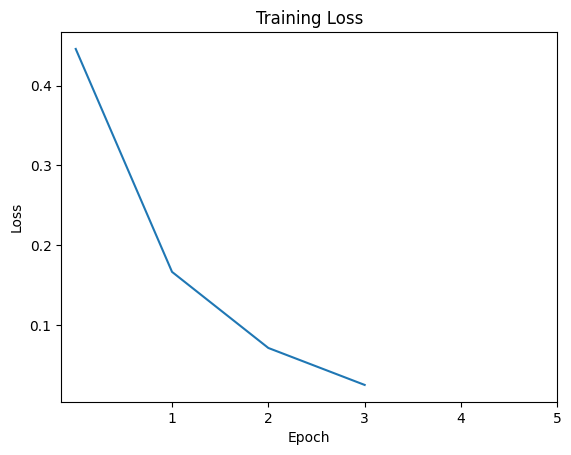

In [29]:
df_stats = pd.DataFrame(data=training_stats)
plt.plot(df_stats['Training Loss'], label="Training")
plt.title("Training Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.xticks([1, 2, 3, 4, 5 ])
plt.show()

In [30]:
test_texts = test.text.values
test_labels = test.encoded_categories.values

input_ids = []
attention_masks = []

for text in test_texts:
    encoded_dict = tokenizer.encode_plus(
                        text,                     
                        add_special_tokens = True, 
                        max_length = max_len,          
                        pad_to_max_length = True,
                        return_attention_mask = True,  
                        return_tensors = 'pt',   
                   )
    
    input_ids.append(encoded_dict['input_ids'])
    attention_masks.append(encoded_dict['attention_mask'])

input_ids = torch.cat(input_ids, dim=0)
attention_masks = torch.cat(attention_masks, dim=0)
labels = torch.tensor(test_labels)

batch_size = 10  

prediction_data = TensorDataset(input_ids, attention_masks, labels)
prediction_sampler = SequentialSampler(prediction_data)
prediction_dataloader = DataLoader(prediction_data, sampler=prediction_sampler, batch_size=batch_size)

Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.


In [31]:
print('Prediction started on test data')
print('Predicting labels for {:,} test sentences...'.format(len(input_ids)))
model.eval()
predictions , true_labels = [], []

for batch in prediction_dataloader:
  batch = tuple(t.to(device) for t in batch)
  b_input_ids, b_input_mask, b_labels = batch

  with torch.no_grad():
      outputs = model(b_input_ids, token_type_ids=None, 
                      attention_mask=b_input_mask)

  logits = outputs[0]
  logits = logits.detach().cpu().numpy()
  label_ids = b_labels.to('cpu').numpy()
  
  predictions.append(logits)
  true_labels.append(label_ids)

print('Prediction completed')

prediction_set = []

for i in range(len(true_labels)):
  pred_labels_i = np.argmax(predictions[i], axis=1).flatten()
  prediction_set.append(pred_labels_i)

prediction_scores = [item for sublist in prediction_set for item in sublist]

Prediction started on test data
Predicting labels for 2,494 test sentences...
Prediction completed


In [32]:
df

,text,is_offensive,target,encoded_categories
0,çürük dişli,1.0,INSULT,4
1,Bu adamın islama ve müslümanlara verdiği zarar...,1.0,RACIST,2
2,erkekler zora gelmez,1.0,SEXIST,1
3,Utanmazın götüne kazık sokmuşlar bu tıkırtı ne...,1.0,PROFANITY,3
4,otomasyon< sistemlerine= doğrudan bağlanabilir,0.0,OTHER,0
...,...,...,...,...
12465,uyuma taklidi yapan tehlikeli bir hayvanın göz...,0.0,OTHER,0
12466,yolda at kavga eden üç oğlan çocuğu görür,0.0,OTHER,0
12467,sizin köpeklerinizin burnu bile daha iyi koku ...,0.0,OTHER,0
12468,hayalleri gerçek etmek için birisinin delilik ...,0.0,OTHER,0


In [33]:
f_score = f1_score(test_labels, prediction_scores, average='macro')
precision = precision_score(test_labels, prediction_scores, average='macro')
recall = recall_score(test_labels, prediction_scores, average='macro')

print("F-Score: ", f_score)
print("Recall: ", recall)
print("Precision: ", precision)

report = pd.DataFrame(classification_report(test_labels, prediction_scores, output_dict=True))
report = report.rename(columns={'1':'SEXIST',
                          '2':'RACIST',
                          '3':'PROFANITY',
                          '4':'INSULT',
                          '0':'OTHER',
                          
                               } )

print(report)


F-Score:  0.7876026147851526
Recall:  0.7890768981754555
Precision:  0.7862569381398402
                OTHER      SEXIST      RACIST   PROFANITY      INSULT    5  \
precision    0.954155    0.958937    0.953883    0.958071    0.892495  0.0   
recall       0.931469    0.954327    0.967980    0.962105    0.918580  0.0   
f1-score     0.942675    0.956627    0.960880    0.960084    0.905350  0.0   
support    715.000000  416.000000  406.000000  475.000000  479.000000  3.0   

           accuracy    macro avg  weighted avg  
precision  0.943464     0.786257      0.942664  
recall     0.943464     0.789077      0.943464  
f1-score   0.943464     0.787603      0.942979  
support    0.943464  2494.000000   2494.000000  


In [43]:
torch.save(model.state_dict(), '/content/teknofest/MyDrive/teknofest2023.pth')

